In [2]:
#imports:
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from glob import glob

savefig = True

In [3]:
#get values:
def load_json(name):
    with open(name) as f:
        data = np.array([v for v in json.load(f).values()])
    return data

#get statistics:
def get_stats(timings):
    no_timeout = timings < 300
    stats = {
        'solved instances': no_timeout.sum(),
        'average time (all)':  timings.mean(),
        'average time (solved)': timings[no_timeout].mean()
    }
    return stats

#generate table:
def make_table(many_timings, bbox=(0.05, 0.60, 0.17, 0.17)):
    spaces = 10
    rows = (' ' * spaces, ' ' * spaces)
    rowcolors = ('C0', 'C1')
    cols = ('Solved \ninstances', 'Average\nruntime')
    
    stats = [get_stats(timings) for timings in many_timings]
    t = [[f'{s["solved instances"]}/40', f'{s["average time (all)"]:.2f} s'] for s in stats]
    return plt.table(t, rowLabels=rows, rowColours=rowcolors, colLabels=cols, bbox=bbox)

#show height on top of each bar:
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                f'{height:.0f}', fontsize=10, ha='center', va='bottom',)
        

def generate_mean(file_names):
    
    #where to store all means:
    means_list = []
    
    for i in range(len(file_names)):
        
        #compute mean runtime for each configuration of parameters:
        data = load_json(file_names[i])
        data_mean = sum(data) / len(data)
        
        means_list.append(data_mean)
        
    mean_value = sum(means_list) / len(means_list)
    return mean_value
        

# CP

In [4]:
#get runtimes:
chuffed_file_names = glob('runtimes/CP-chuffed-*.json')
gecode_file_names = glob('runtimes/CP-gecode-*.json')

print("\n\nChuffed Runtimes:\n")
for i in range(len(chuffed_file_names)):
    print(f"{i}.\t{chuffed_file_names[i]}\t")

print("\n\nGecode Runtimes:\n")
for i in range(len(gecode_file_names)):
    print(f"{i}.\t{gecode_file_names[i]}")

gecode_mean = generate_mean(gecode_file_names)
print(f"\nMean of all runtimes obtained with Gecode solver:\t{gecode_mean}")

chuffed_mean = generate_mean(chuffed_file_names)
print(f"Mean of all runtimes obtained with Chuffed solver:\t{chuffed_mean}")




Chuffed Runtimes:

0.	runtimes/CP-chuffed-sb-heuinput_order-restartgeom.json	
1.	runtimes/CP-chuffed-sb-heufirst_fail-restartgeom.json	
2.	runtimes/CP-chuffed-sb-rot-heuinput_order-restartgeom.json	
3.	runtimes/CP-chuffed-rot-heudom_w_deg-restartluby.json	
4.	runtimes/CP-chuffed-sb-rot-heudom_w_deg-restartnone.json	
5.	runtimes/CP-chuffed-sb-rot-heudom_w_deg-restartluby.json	
6.	runtimes/CP-chuffed-rot-heuinput_order-restartgeom.json	
7.	runtimes/CP-chuffed-rot-heudom_w_deg-restartnone.json	
8.	runtimes/CP-chuffed-heudom_w_deg-restartluby.json	
9.	runtimes/CP-chuffed-sb-rot-heufirst_fail-restartgeom.json	
10.	runtimes/CP-chuffed-heudom_w_deg-restartnone.json	
11.	runtimes/CP-chuffed-sb-heudom_w_deg-restartgeom.json	
12.	runtimes/CP-chuffed-heufirst_fail-restartgeom.json	
13.	runtimes/CP-chuffed-heuinput_order-restartluby.json	
14.	runtimes/CP-chuffed-rot-heufirst_fail-restartgeom.json	
15.	runtimes/CP-chuffed-heuinput_order-restartnone.json	
16.	runtimes/CP-chuffed-sb-heuinput_order-

In [4]:
file_names = glob('runtimes/CP-chuffed-*.json')

solved_instances = {}
keys = []
values = []
averages = []

for i in range(len(file_names)):
    
    runlist = load_json(file_names[i]) 
    runtimes = [value for value in runlist if value < 300]
    
    values.append(len(runtimes))
    keys.append(file_names[i])
    averages.append(sum(runtimes)/len(runtimes))

solved_instances = {k: v for k, v in zip(keys, values)}
solved_instances_mean = {k: v for k, v in zip(keys, averages)}


for i in sorted(solved_instances.keys()):
    print(f"{i}.\t{solved_instances[i]}\t{solved_instances_mean[i]}\n")

runtimes/CP-chuffed-heudom_w_deg-restartgeom.json.	29	11.787137931034483

runtimes/CP-chuffed-heudom_w_deg-restartnone.json.	33	16.439909090909094

runtimes/CP-chuffed-heufirst_fail-restartgeom.json.	30	17.172633333333334

runtimes/CP-chuffed-heufirst_fail-restartnone.json.	33	15.548545454545454

runtimes/CP-chuffed-heuinput_order-restartgeom.json.	30	15.900466666666667

runtimes/CP-chuffed-heuinput_order-restartnone.json.	34	19.564735294117646

runtimes/CP-chuffed-rot-heudom_w_deg-restartgeom.json.	17	12.454117647058823

runtimes/CP-chuffed-rot-heudom_w_deg-restartnone.json.	24	32.93383325

runtimes/CP-chuffed-rot-heufirst_fail-restartgeom.json.	19	32.36615784210527

runtimes/CP-chuffed-rot-heufirst_fail-restartnone.json.	24	33.08670833333334

runtimes/CP-chuffed-rot-heuinput_order-restartgeom.json.	19	32.58473678947369

runtimes/CP-chuffed-rot-heuinput_order-restartnone.json.	24	24.443583333333333

runtimes/CP-chuffed-sb-heudom_w_deg-restartgeom.json.	29	13.45758620689655

runtimes/C

# Plot Rotation and Not Rotation

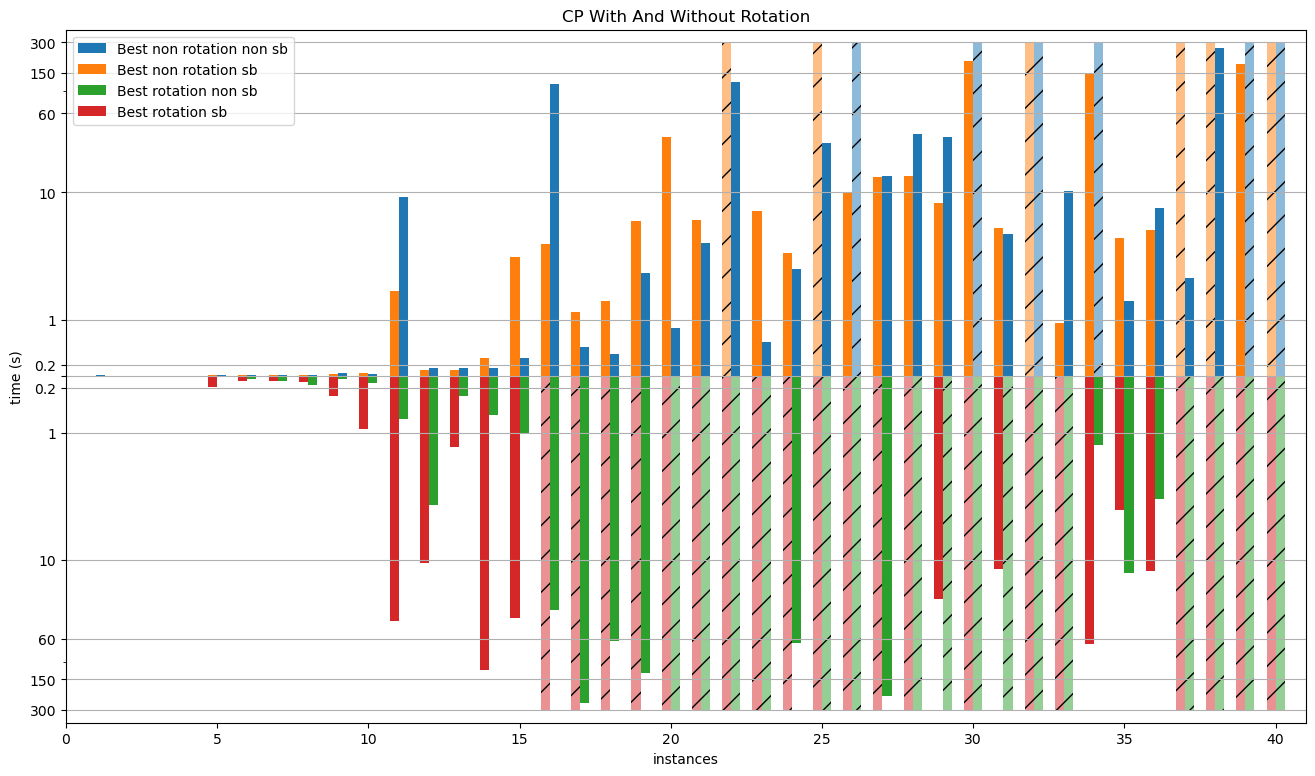

In [4]:
w = 0.3
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

#non rotation:
best_nonrot = load_json(f'runtimes/CP-chuffed-heuinput_order-restartnone.json')
bnr_done = np.argwhere(best_nonrot < 300).squeeze()
bnr_timeout = np.argwhere(best_nonrot >= 300).squeeze()

#symmetry breaking non rotation:
best_sb_nonrot = load_json(f'runtimes/CP-chuffed-sb-heuinput_order-restartnone.json')
bsbnr_done = np.argwhere(best_sb_nonrot < 300).squeeze()
bsbnr_timeout = np.argwhere(best_sb_nonrot >= 300).squeeze()

#rotation:
best_rot = load_json(f'runtimes/CP-chuffed-rot-heudom_w_deg-restartnone.json')
br_done = np.argwhere(best_rot < 300).squeeze()
br_timeout = np.argwhere(best_rot >= 300).squeeze()

#symmetry breaking rotation:
best_sb_rot = load_json(f'runtimes/CP-chuffed-sb-rot-heudom_w_deg-restartnone.json')
bsbr_done = np.argwhere(best_sb_rot < 300).squeeze()
bsbr_timeout = np.argwhere(best_sb_rot >= 300).squeeze()

#flip rotation bars:
best_rot *= -1
#br_done *= -1
#br_timeout *= -1
best_sb_rot *= -1
#bsbr_done *= -1
#bsbr_timeout *= -1

#***NON ROTATION***:

#non rotation non sb finished before 300:
r1 = ax.bar(bnr_done + (w/2) + 1, best_nonrot[bnr_done], width=w, color='C0', align='center', 
            label=f'{"Best non rotation non sb"}')

#non rotation non sb finished after 300:
r2 = ax.bar(bnr_timeout + (w/2) + 1, best_nonrot[bnr_timeout], width=w, color='C0', align='center',
           alpha = 0.5, hatch = '/')

#non rotation sb finished before 300:
r3 = ax.bar(bsbnr_done - (w/2) + 1, best_sb_nonrot[bsbnr_done], width=w, color='C1', align='center', 
            label=f'{"Best non rotation sb"}')

#non rotation sb finished after 300:
r4 = ax.bar(bsbnr_timeout - (w/2) + 1, best_sb_nonrot[bsbnr_timeout], width=w, color='C1', align='center',
           alpha = 0.5, hatch = '/')

#***ROTATION***:

#rotation non sb finished before 300:
r5 = ax.bar(br_done + (w/2) + 1, best_rot[br_done], width=w, color='C2', align='center', 
            label=f'{"Best rotation non sb"}')

#rotation non sb finished after 300:
r6 = ax.bar(br_timeout + (w/2) + 1, best_rot[br_timeout], width=w, color='C2', align='center',
           alpha = 0.5, hatch = '/')

#rotation sb finished before 300:
r7 = ax.bar(bsbr_done - (w/2) + 1, best_sb_rot[bsbr_done], width=w, color='C3', align='center', 
            label=f'{"Best rotation sb "}')

#rotation sb finished after 300:
r8 = ax.bar(bsbr_timeout - (w/2) + 1, best_sb_rot[bsbr_timeout], width=w, color='C3', align='center',
           alpha = 0.5, hatch = '/')

plt.title("CP With And Without Rotation")
ax.set_xlabel('instances')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 41)
ax.set_ylim(-400, 400)
#ax.set_xticks(list(range(1, 41)))
ax.legend()
ax.set_yscale('symlog')
ax.set_yticks([-300, -150, -60, -10, -1, -0.2, 0, 0.2, 1, 10, 60, 150, 300])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.set_yticklabels([300, 150, 60, 10, 1, 0.2, '', 0.2, 1, 10, 60, 150, 300])
ax.grid(axis='y')

fig.savefig('Plots_Images/CP_withrot_withoutrot.png')
plt.show()

# SAT

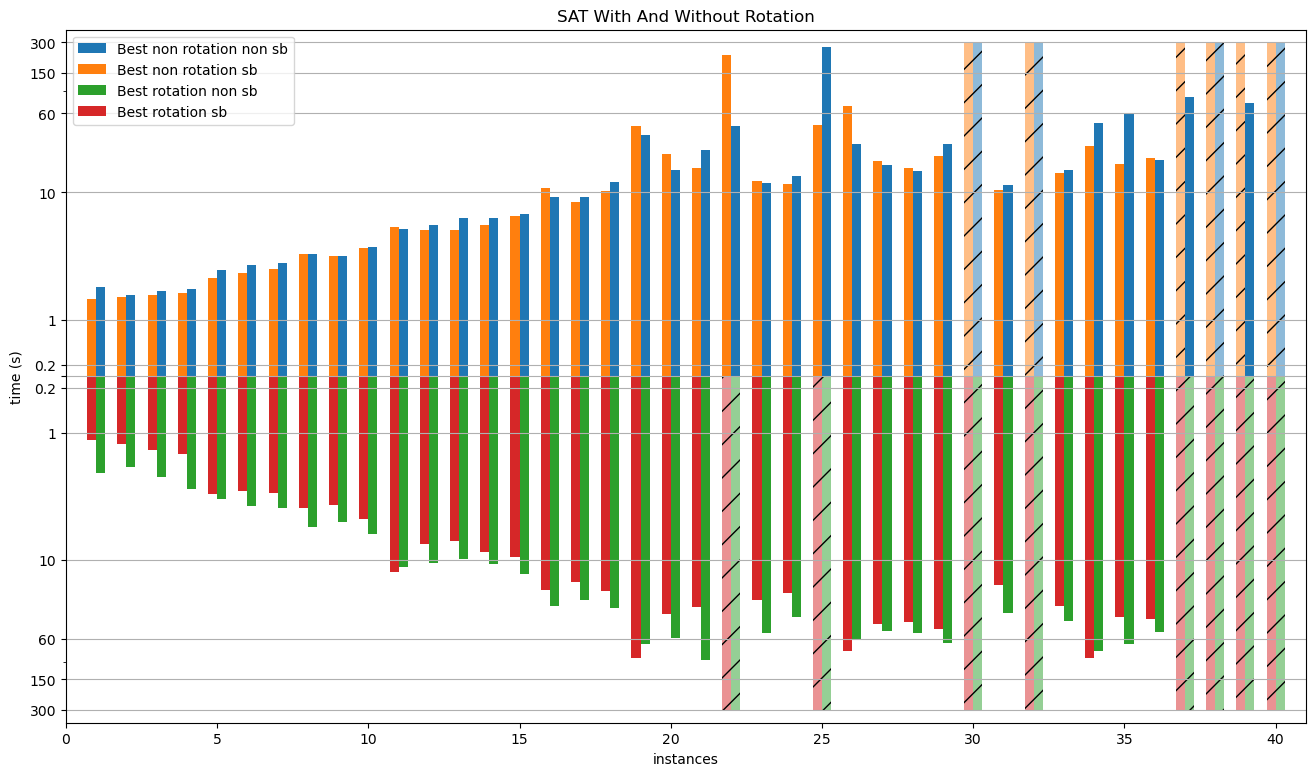

In [5]:
w = 0.3
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

#non rotation:
best_nonrot = load_json(f'runtimes/SAT.json')
bnr_done = np.argwhere(best_nonrot < 300).squeeze()
bnr_timeout = np.argwhere(best_nonrot >= 300).squeeze()

#symmetry breaking non rotation:
best_sb_nonrot = load_json(f'runtimes/SAT-sb.json')
bsbnr_done = np.argwhere(best_sb_nonrot < 300).squeeze()
bsbnr_timeout = np.argwhere(best_sb_nonrot >= 300).squeeze()

#rotation:
best_rot = load_json(f'runtimes/SAT-rot.json')
br_done = np.argwhere(best_rot < 300).squeeze()
br_timeout = np.argwhere(best_rot >= 300).squeeze()

#symmetry breaking rotation:
best_sb_rot = load_json(f'runtimes/SAT-sb-rot.json')
bsbr_done = np.argwhere(best_sb_rot < 300).squeeze()
bsbr_timeout = np.argwhere(best_sb_rot >= 300).squeeze()

#flip rotation bars:
best_rot *= -1
#br_done *= -1
#br_timeout *= -1
best_sb_rot *= -1
#bsbr_done *= -1
#bsbr_timeout *= -1

#***NON ROTATION***:

#non rotation non sb finished before 300:
r1 = ax.bar(bnr_done + (w/2) + 1, best_nonrot[bnr_done], width=w, color='C0', align='center', 
            label=f'{"Best non rotation non sb"}')

#non rotation non sb finished after 300:
r2 = ax.bar(bnr_timeout + (w/2) + 1, best_nonrot[bnr_timeout], width=w, color='C0', align='center',
           alpha = 0.5, hatch = '/')

#non rotation sb finished before 300:
r3 = ax.bar(bsbnr_done - (w/2) + 1, best_sb_nonrot[bsbnr_done], width=w, color='C1', align='center', 
            label=f'{"Best non rotation sb"}')

#non rotation sb finished after 300:
r4 = ax.bar(bsbnr_timeout - (w/2) + 1, best_sb_nonrot[bsbnr_timeout], width=w, color='C1', align='center',
           alpha = 0.5, hatch = '/')

#***ROTATION***:

#rotation non sb finished before 300:
r5 = ax.bar(br_done + (w/2) + 1, best_rot[br_done], width=w, color='C2', align='center', 
            label=f'{"Best rotation non sb"}')

#rotation non sb finished after 300:
r6 = ax.bar(br_timeout + (w/2) + 1, best_rot[br_timeout], width=w, color='C2', align='center',
           alpha = 0.5, hatch = '/')

#rotation sb finished before 300:
r7 = ax.bar(bsbr_done - (w/2) + 1, best_sb_rot[bsbr_done], width=w, color='C3', align='center', 
            label=f'{"Best rotation sb "}')

#rotation sb finished after 300:
r8 = ax.bar(bsbr_timeout - (w/2) + 1, best_sb_rot[bsbr_timeout], width=w, color='C3', align='center',
           alpha = 0.5, hatch = '/')

plt.title("SAT With And Without Rotation")
ax.set_xlabel('instances')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 41)
ax.set_ylim(-400, 400)
#ax.set_xticks(list(range(1, 41)))
ax.legend()
ax.set_yscale('symlog')
ax.set_yticks([-300, -150, -60, -10, -1, -0.2, 0, 0.2, 1, 10, 60, 150, 300])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.set_yticklabels([300, 150, 60, 10, 1, 0.2, '', 0.2, 1, 10, 60, 150, 300])
ax.grid(axis='y')

fig.savefig('Plots_Images/SAT_withrot_withoutrot.png')
plt.show()

# SMT

FileNotFoundError: [Errno 2] No such file or directory: 'runtimes/SMT.json'

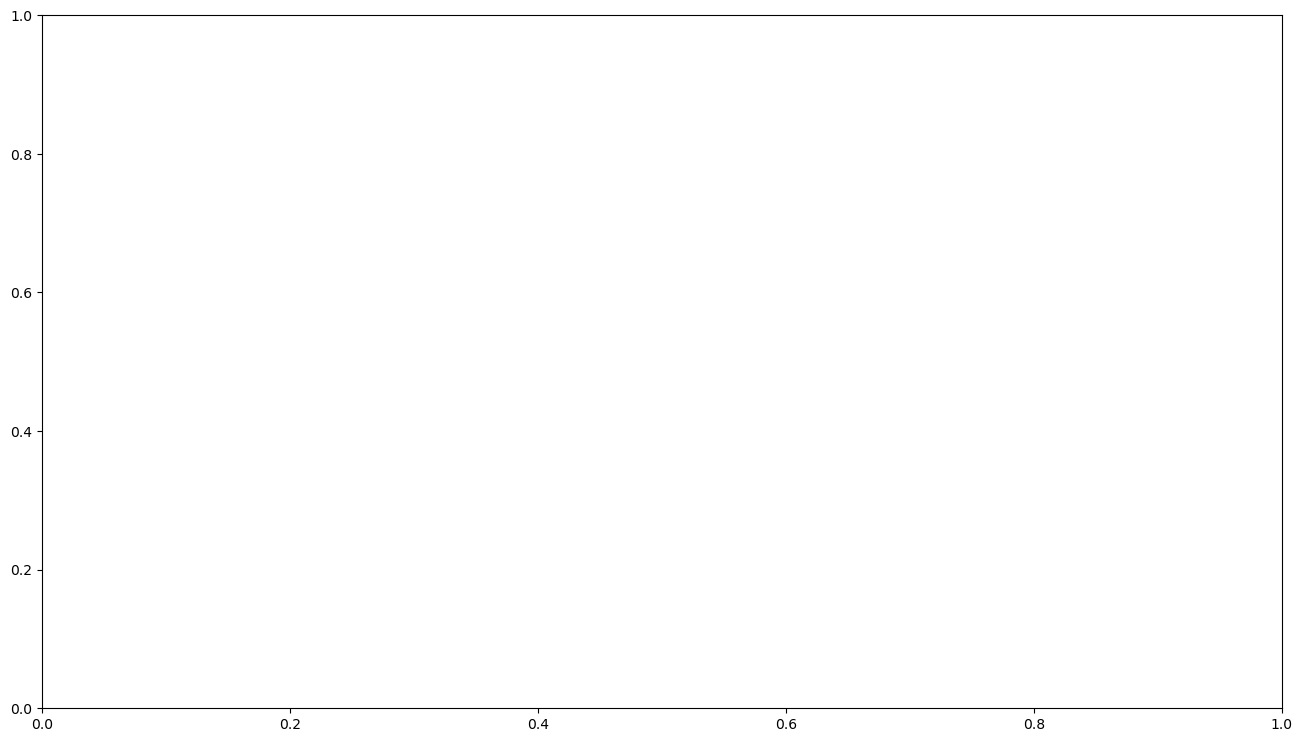

In [13]:
w = 0.3
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

#non rotation:
best_nonrot = load_json(f'runtimes/SMT.json')
bnr_done = np.argwhere(best_nonrot < 300).squeeze()
bnr_timeout = np.argwhere(best_nonrot >= 300).squeeze()

#symmetry breaking non rotation:
best_sb_nonrot = load_json(f'runtimes/SMT-sb.json')
bsbnr_done = np.argwhere(best_sb_nonrot < 300).squeeze()
bsbnr_timeout = np.argwhere(best_sb_nonrot >= 300).squeeze()

#rotation:
best_rot = load_json(f'runtimes/SMT-rot.json')
br_done = np.argwhere(best_rot < 300).squeeze()
br_timeout = np.argwhere(best_rot >= 300).squeeze()

#symmetry breaking rotation:
best_sb_rot = load_json(f'runtimes/SMT-sb-rot.json')
bsbr_done = np.argwhere(best_sb_rot < 300).squeeze()
bsbr_timeout = np.argwhere(best_sb_rot >= 300).squeeze()

#flip rotation bars:
best_rot *= -1
#br_done *= -1
#br_timeout *= -1
best_sb_rot *= -1
#bsbr_done *= -1
#bsbr_timeout *= -1

#***NON ROTATION***:

#non rotation non sb finished before 300:
r1 = ax.bar(bnr_done + (w/2) + 1, best_nonrot[bnr_done], width=w, color='C0', align='center', 
            label=f'{"Best non rotation non sb"}')

#non rotation non sb finished after 300:
r2 = ax.bar(bnr_timeout + (w/2) + 1, best_nonrot[bnr_timeout], width=w, color='C0', align='center',
           alpha = 0.5, hatch = '/')

#non rotation sb finished before 300:
r3 = ax.bar(bsbnr_done - (w/2) + 1, best_sb_nonrot[bsbnr_done], width=w, color='C1', align='center', 
            label=f'{"Best non rotation sb"}')

#non rotation sb finished after 300:
r4 = ax.bar(bsbnr_timeout - (w/2) + 1, best_sb_nonrot[bsbnr_timeout], width=w, color='C1', align='center',
           alpha = 0.5, hatch = '/')

#***ROTATION***:

#rotation non sb finished before 300:
r5 = ax.bar(br_done + (w/2) + 1, best_rot[br_done], width=w, color='C2', align='center', 
            label=f'{"Best rotation non sb"}')

#rotation non sb finished after 300:
r6 = ax.bar(br_timeout + (w/2) + 1, best_rot[br_timeout], width=w, color='C2', align='center',
           alpha = 0.5, hatch = '/')

#rotation sb finished before 300:
r7 = ax.bar(bsbr_done - (w/2) + 1, best_sb_rot[bsbr_done], width=w, color='C3', align='center', 
            label=f'{"Best rotation sb "}')

#rotation sb finished after 300:
r8 = ax.bar(bsbr_timeout - (w/2) + 1, best_sb_rot[bsbr_timeout], width=w, color='C3', align='center',
           alpha = 0.5, hatch = '/')

plt.title("SMT With And Without Rotation")
ax.set_xlabel('instances')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 41)
ax.set_ylim(-400, 400)
#ax.set_xticks(list(range(1, 41)))
ax.legend()
ax.set_yscale('symlog')
ax.set_yticks([-300, -150, -60, -10, -1, -0.2, 0, 0.2, 1, 10, 60, 150, 300])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.set_yticklabels([300, 150, 60, 10, 1, 0.2, '', 0.2, 1, 10, 60, 150, 300])
ax.grid(axis='y')

fig.savefig('Plots_Images/SMT_withrot_withoutrot.png')
plt.show()

# MIP

FileNotFoundError: [Errno 2] No such file or directory: 'runtimes/MIP.json'

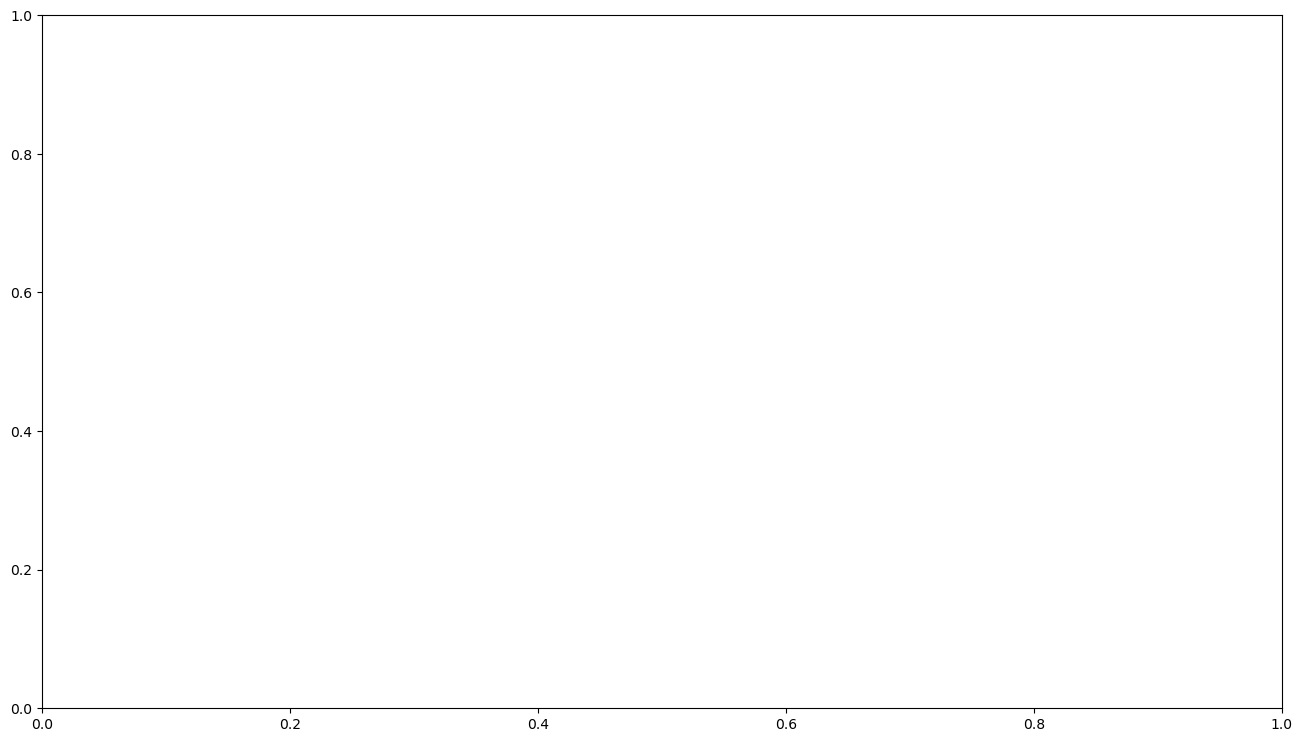

In [18]:
w = 0.3
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

#non rotation:
best_nonrot = load_json(f'runtimes/MIP.json')
bnr_done = np.argwhere(best_nonrot < 300).squeeze()
bnr_timeout = np.argwhere(best_nonrot >= 300).squeeze()

#symmetry breaking non rotation:
best_sb_nonrot = load_json(f'runtimes/MIP-sb.json')
bsbnr_done = np.argwhere(best_sb_nonrot < 300).squeeze()
bsbnr_timeout = np.argwhere(best_sb_nonrot >= 300).squeeze()

#rotation:
best_rot = load_json(f'runtimes/MIP-rot.json')
br_done = np.argwhere(best_rot < 300).squeeze()
br_timeout = np.argwhere(best_rot >= 300).squeeze()

#symmetry breaking rotation:
best_sb_rot = load_json(f'runtimes/MIP-sb-rot.json')
bsbr_done = np.argwhere(best_sb_rot < 300).squeeze()
bsbr_timeout = np.argwhere(best_sb_rot >= 300).squeeze()

#flip rotation bars:
best_rot *= -1
#br_done *= -1
#br_timeout *= -1
best_sb_rot *= -1
#bsbr_done *= -1
#bsbr_timeout *= -1

#***NON ROTATION***:

#non rotation non sb finished before 300:
r1 = ax.bar(bnr_done + (w/2) + 1, best_nonrot[bnr_done], width=w, color='C0', align='center', 
            label=f'{"Best non rotation non sb"}')

#non rotation non sb finished after 300:
r2 = ax.bar(bnr_timeout + (w/2) + 1, best_nonrot[bnr_timeout], width=w, color='C0', align='center',
           alpha = 0.5, hatch = '/')

#non rotation sb finished before 300:
r3 = ax.bar(bsbnr_done - (w/2) + 1, best_sb_nonrot[bsbnr_done], width=w, color='C1', align='center', 
            label=f'{"Best non rotation sb"}')

#non rotation sb finished after 300:
r4 = ax.bar(bsbnr_timeout - (w/2) + 1, best_sb_nonrot[bsbnr_timeout], width=w, color='C1', align='center',
           alpha = 0.5, hatch = '/')

#***ROTATION***:

#rotation non sb finished before 300:
r5 = ax.bar(br_done + (w/2) + 1, best_rot[br_done], width=w, color='C2', align='center', 
            label=f'{"Best rotation non sb"}')

#rotation non sb finished after 300:
r6 = ax.bar(br_timeout + (w/2) + 1, best_rot[br_timeout], width=w, color='C2', align='center',
           alpha = 0.5, hatch = '/')

#rotation sb finished before 300:
r7 = ax.bar(bsbr_done - (w/2) + 1, best_sb_rot[bsbr_done], width=w, color='C3', align='center', 
            label=f'{"Best rotation sb "}')

#rotation sb finished after 300:
r8 = ax.bar(bsbr_timeout - (w/2) + 1, best_sb_rot[bsbr_timeout], width=w, color='C3', align='center',
           alpha = 0.5, hatch = '/')

plt.title("MIP With And Without Rotation")
ax.set_xlabel('instances')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 41)
ax.set_ylim(-400, 400)
#ax.set_xticks(list(range(1, 41)))
ax.legend()
ax.set_yscale('symlog')
ax.set_yticks([-300, -150, -60, -10, -1, -0.2, 0, 0.2, 1, 10, 60, 150, 300])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.set_yticklabels([300, 150, 60, 10, 1, 0.2, '', 0.2, 1, 10, 60, 150, 300])
ax.grid(axis='y')

fig.savefig('Plots_Images/MIP_withrot_withoutrot.png')
plt.show()

### Without Rotation

In [5]:
w = 0.4
baseline = load_json('runtimes/CP.json')
no_area = load_json('runtimes/CP-sb.json')
bl_done = np.argwhere(baseline < 300).squeeze()
na_done = np.argwhere(no_area < 300).squeeze() 
bl_timeout = np.argwhere(baseline >= 300).squeeze()
na_timeout = np.argwhere(no_area >= 300).squeeze()

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
r1 = ax.bar(bl_done + (w/2) + 1, baseline[bl_done], width=w, color='C0', align='center', 
            label='Baseline')
r2 = ax.bar(na_done - (w/2) + 1, no_area[na_done], width=w, color='C1', align='center', 
            label='Symmetry breaking')
r3 = ax.bar(bl_timeout + (w/2) + 1, baseline[bl_timeout], width=w, color='C0', 
            hatch='//', alpha=0.3, align='center')
r4 = ax.bar(na_timeout - (w/2) + 1, no_area[na_timeout], width=w, color='C1', 
            hatch='//', alpha=0.3, align='center')

table = make_table([baseline, no_area], bbox=(0.05, 0.75, 0.17, 0.17))

ax.set_xlabel('instances')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 41)
ax.set_xticks(list(range(1, 41)))
ax.legend()
ax.set_yscale('log')
ax.set_yticks([0.1, 1, 10, 60, 150, 300])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.grid(axis='y')
if savefig:
    fig.savefig('Plots_Images/CP_NoRotation')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'runtimes/CP.json'

### With Rotation

In [ ]:
w = 0.4
baseline = load_json('runtimes/CP-rot.json')
no_area = load_json('runtimes/CP-sb-rot.json')
bl_done = np.argwhere(baseline < 300).squeeze()
na_done = np.argwhere(no_area < 300).squeeze() 
bl_timeout = np.argwhere(baseline >= 300).squeeze()
na_timeout = np.argwhere(no_area >= 300).squeeze()

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
r1 = ax.bar(bl_done + (w/2) + 1, baseline[bl_done], width=w, color='C0', align='center', 
            label='Baseline')
r2 = ax.bar(na_done - (w/2) + 1, no_area[na_done], width=w, color='C1', align='center', 
            label='Symmetry breaking')
r3 = ax.bar(bl_timeout + (w/2) + 1, baseline[bl_timeout], width=w, color='C0', 
            hatch='//', alpha=0.3, align='center')
r4 = ax.bar(na_timeout - (w/2) + 1, no_area[na_timeout], width=w, color='C1', 
            hatch='//', alpha=0.3, align='center')

table = make_table([baseline, no_area], bbox=(0.05, 0.75, 0.17, 0.17))

ax.set_xlabel('instances')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 41)
ax.set_xticks(list(range(1, 41)))
ax.legend()
ax.set_yscale('log')
ax.set_yticks([0.1, 1, 10, 60, 150, 300])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.grid(axis='y')
if savefig:
    fig.savefig('Plots_Images/CP_Rotation')
plt.show()

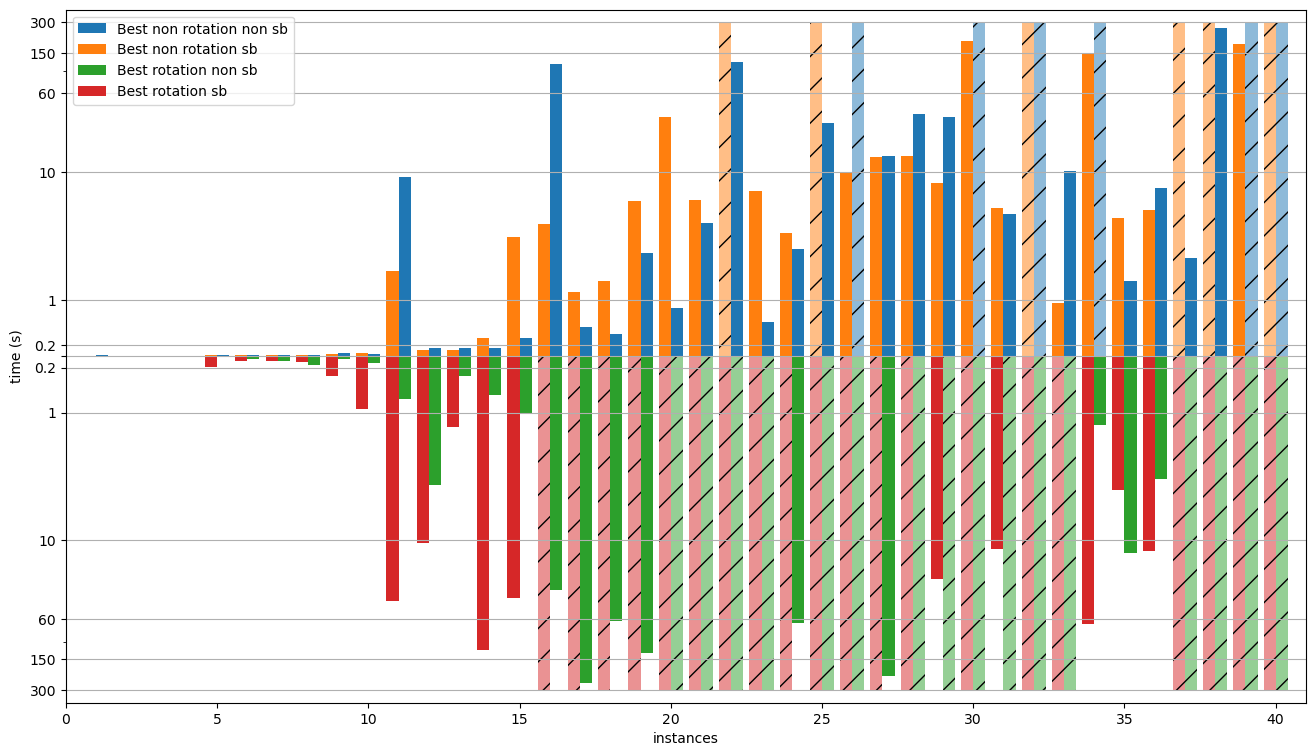

# LE PROSSIME DUE CELLE NON SO COSA SIANO PERCHÉ NON HO I RUNTIMES

In [ ]:
dual = load_json('timings/CP-a-dual-heu0-restart1.json')

w = 0.4

bl_done = np.argwhere(baseline < 300).squeeze()
dual_done = np.argwhere(dual < 300).squeeze() 
bl_timeout = np.argwhere(baseline >= 300).squeeze()
dual_timeout = np.argwhere(dual >= 300).squeeze()

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
r1 = ax.bar(bl_done + (w/2) + 1, baseline[bl_done], width=w, color='C0', align='center', 
            label=f'Baseline')
r2 = ax.bar(dual_done - (w/2) + 1, dual[dual_done], width=w, color='C1', align='center', 
            label=f'Dual model')
r3 = ax.bar(bl_timeout + (w/2) + 1, baseline[bl_timeout], width=w, color='C0', hatch='//', alpha=0.3, align='center')
r4 = ax.bar(dual_timeout - (w/2) + 1, dual[dual_timeout], width=w, color='C1', hatch='//', alpha=0.3, align='center')

table = make_table([baseline, dual])

ax.set_xlabel('instances')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 41)
ax.set_xticks(list(range(1, 41)))
ax.legend()
ax.set_yscale('log')
ax.set_yticks([0.1, 1, 10, 60, 150, 300])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.grid(axis='y')
if savefig:
    fig.savefig('CP_dual')
plt.show()

In [ ]:
w = 0.3
int2heu = {0: 'input_order', 1: 'dom_w_deg', 2: 'impact'}
for heu in (0, 1, 2):
    fig, ax = plt.subplots(1, 1, figsize=(16, 9))
    for rot in (False, True):
        restart0 = load_json(f'timings/CP-a{"-rot" if rot else ""}-heu{heu}-restart0.json')
        restart1 = load_json(f'timings/CP-a{"-rot" if rot else ""}-heu{heu}-restart1.json')
        restart2 = load_json(f'timings/CP-a{"-rot" if rot else ""}-heu{heu}-restart2.json')
    
        r1_done = np.argwhere(restart0 < 300).squeeze()
        r2_done = np.argwhere(restart1 < 300).squeeze() 
        r3_done = np.argwhere(restart2 < 300).squeeze() 
        r1_timeout = np.argwhere(restart0 >= 300).squeeze()
        r2_timeout = np.argwhere(restart1 >= 300).squeeze()
        r3_timeout = np.argwhere(restart2 >= 300).squeeze()
        if rot:
            restart0 *= -1
            restart1 *= -1
            restart2 *= -1

        r1 = ax.bar(r1_done - (3*w/2) + 1, restart0[r1_done], width=w, color='C0', align='center', 
                    label=f'{"No restart" if not rot else ""}')
        r2 = ax.bar(r2_done - (w/2) + 1, restart1[r2_done], width=w, color='C3', align='center', 
                    label=f'{"luby(150)" if not rot else ""}')
        r3 = ax.bar(r3_done + (w/2) + 1, restart2[r3_done], width=w, color='C2', align='center', 
                    label=f'{"geometric(2, 50)" if not rot else ""}')
        r4 = ax.bar(r1_timeout - (3*w/2) + 1, restart0[r1_timeout], width=w, color='C0', hatch='//', alpha=0.3, align='center')
        r5 = ax.bar(r2_timeout - (w/2) + 1, restart1[r2_timeout], width=w, color='C3', hatch='//', alpha=0.3, align='center')
        r6 = ax.bar(r3_timeout + (w/2) + 1, restart2[r3_timeout], width=w, color='C2', hatch='//', alpha=0.3, align='center')
        ax.set_xlabel('instances')
    ax.set_title(f'Performances for {int2heu[heu]} heuristic based ')
    ax.set_ylabel('time (s)')
    ax.set_xlim(0, 41)
    ax.set_ylim(-400, 400)
    ax.set_xticks(list(range(1, 41)))
    ax.legend()
    ax.set_yscale('symlog')
    ax.set_yticks([-300, -150, -60, -10, -1, -0.2, 0, 0.2, 1, 10, 60, 150, 300])
    ax.get_yaxis().set_major_formatter(ScalarFormatter())
    ax.set_yticklabels([300, 150, 60, 10, 1, 0.2, '', 0.2, 1, 10, 60, 150, 300])
    ax.grid(axis='y')
    if savefig:
        fig.savefig(f'CP_heuristic{heu}')
    plt.show()

In [ ]:
for rot in (False, True):
    for heu in (0, 1, 2):
        for restart in (0, 1, 2):
            name = f'timings/CP-a{"-rot" if rot else ""}-heu{heu}-restart{restart}.json'
            data = load_json(name)
            s = get_stats(data)
            print(f"heu: {heu}, restart: {restart}, {'with rotations' if rot else ''}")
            print(f"solved: {s['solved instances']}, avg time: {s['average time (all)']:.2f}\n")

# SAT Plots

In [ ]:
glob('runtimes/SAT*.json')

### Without Rotation

In [ ]:
w = 0.4
baseline = load_json('runtimes/SAT.json')
no_area = load_json('runtimes/SAT-sb.json')
bl_done = np.argwhere(baseline < 300).squeeze()
na_done = np.argwhere(no_area < 300).squeeze() 
bl_timeout = np.argwhere(baseline >= 300).squeeze()
na_timeout = np.argwhere(no_area >= 300).squeeze()

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
r1 = ax.bar(bl_done + (w/2) + 1, baseline[bl_done], width=w, color='C0', align='center', 
            label='Baseline')
r2 = ax.bar(na_done - (w/2) + 1, no_area[na_done], width=w, color='C1', align='center', 
            label='Symmetry breaking')
r3 = ax.bar(bl_timeout + (w/2) + 1, baseline[bl_timeout], width=w, color='C0', 
            hatch='//', alpha=0.3, align='center')
r4 = ax.bar(na_timeout - (w/2) + 1, no_area[na_timeout], width=w, color='C1', 
            hatch='//', alpha=0.3, align='center')

table = make_table([baseline, no_area], bbox=(0.05, 0.75, 0.17, 0.17))

ax.set_xlabel('instances')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 41)
#ax.set_xticks(list(range(1, 41)))
ax.legend()
ax.set_yscale('log')
ax.set_yticks([0.1, 1, 10, 60, 150, 300])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.grid(axis='y')
if savefig:
    fig.savefig('Plots_Images/SAT_NoRotation')
plt.show()

### With Rotation

In [ ]:
w = 0.4
baseline = load_json('runtimes/SAT-rot.json')
no_area = load_json('runtimes/SAT-sb-rot.json')
bl_done = np.argwhere(baseline < 300).squeeze()
na_done = np.argwhere(no_area < 300).squeeze() 
bl_timeout = np.argwhere(baseline >= 300).squeeze()
na_timeout = np.argwhere(no_area >= 300).squeeze()

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
r1 = ax.bar(bl_done + (w/2) + 1, baseline[bl_done], width=w, color='C0', align='center', 
            label='Baseline')
r2 = ax.bar(na_done - (w/2) + 1, no_area[na_done], width=w, color='C1', align='center', 
            label='Symmetry breaking')
r3 = ax.bar(bl_timeout + (w/2) + 1, baseline[bl_timeout], width=w, color='C0', 
            hatch='//', alpha=0.3, align='center')
r4 = ax.bar(na_timeout - (w/2) + 1, no_area[na_timeout], width=w, color='C1', 
            hatch='//', alpha=0.3, align='center')

table = make_table([baseline, no_area], bbox=(0.05, 0.75, 0.17, 0.17))

ax.set_xlabel('instances')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 41)
#ax.set_xticks(list(range(1, 41)))
ax.legend()
ax.set_yscale('log')
ax.set_yticks([0.1, 1, 10, 60, 150, 300])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.grid(axis='y')
if savefig:
    fig.savefig('Plots_Images/SAT_Rotation')
plt.show()

### With rotation and without rotation comparison

## PER GIANLU (una volta che funziona il plot capovolto, basta cambiare i file e si copia e incolla per SMT, MIP e CP)

In [ ]:
w = 0.4
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

for rot in (False, True):
    baseline = load_json(f'runtimes/SAT.json')
    search = load_json(f'runtimes/SAT-sb.json')
    bl_done = np.argwhere(baseline < 300).squeeze()
    se_done = np.argwhere(search < 300).squeeze() 
    bl_timeout = np.argwhere(baseline >= 300).squeeze()
    se_timeout = np.argwhere(search >= 300).squeeze()

    if rot:
        baseline *= -1
        search *= -1

    r1 = ax.bar(bl_done + (w/2) + 1, baseline[bl_done], width=w, color='C0', align='center', 
                label=f'{"Baseline, without rotation" if not rot else ""}')
    r2 = ax.bar(se_done - (w/2) + 1, search[se_done], width=w, color='C1', align='center', 
                label=f'{"Baseline, with rotation" if not rot else ""}')
    r3 = ax.bar(bl_timeout + (w/2) + 1, baseline[bl_timeout], width=w, color='C3', 
                hatch='//', alpha=0.3, align='center')
    r4 = ax.bar(se_timeout - (w/2) + 1, search[se_timeout], width=w, color='C1', 
                hatch='//', alpha=0.3, align='center')

    # table = make_table([baseline, no_area], bbox=(0.05, 0.75, 0.17, 0.17))

ax.set_xlabel('instances')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 41)
ax.set_ylim(-400, 400)
#ax.set_xticks(list(range(1, 41)))
ax.legend()
ax.set_yscale('symlog')
ax.set_yticks([-300, -150, -60, -10, -1, -0.2, 0, 0.2, 1, 10, 60, 150, 300])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.set_yticklabels([300, 150, 60, 10, 1, 0.2, '', 0.2, 1, 10, 60, 150, 300])
ax.grid(axis='y')
if savefig:
    fig.savefig('SAT_search_and_rot')
plt.show()

# SMT

In [ ]:
glob('runtimes/SMT*.json')

### Without Rotation

In [ ]:
w = 0.4

baseline = load_json('runtimes/SMT.json')
no_area = load_json('runtimes/SMT-sb.json')

bl_done = np.argwhere(baseline < 300).squeeze()
na_done = np.argwhere(no_area < 300).squeeze() 
bl_timeout = np.argwhere(baseline >= 300).squeeze()
na_timeout = np.argwhere(no_area >= 300).squeeze()

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
r1 = ax.bar(bl_done + (w/2) + 1, baseline[bl_done], width=w, color='C0', align='center', 
            label='Baseline')
r2 = ax.bar(na_done - (w/2) + 1, no_area[na_done], width=w, color='C1', align='center', 
            label='Symmetry-Breaking')
r3 = ax.bar(bl_timeout + (w/2) + 1, baseline[bl_timeout], width=w, color='C0', 
            hatch='//', alpha=0.3, align='center')
r4 = ax.bar(na_timeout - (w/2) + 1, no_area[na_timeout], width=w, color='C1', 
            hatch='//', alpha=0.3, align='center')

table = make_table([baseline, no_area])

ax.set_xlabel('instances')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 41)
ax.set_xticks(list(range(1, 41)))
ax.legend()
ax.set_yscale('log')
ax.set_yticks([0.1, 1, 10, 60, 150, 300])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.grid(axis='y')
if savefig:
    fig.savefig('Plots_Images/SMT_NoRotation')
plt.show()

### With Rotation

In [ ]:
w = 0.4

baseline = load_json('runtimes/SMT-rot.json')
no_area = load_json('runtimes/SMT-sb-rot.json')

bl_done = np.argwhere(baseline < 300).squeeze()
na_done = np.argwhere(no_area < 300).squeeze() 
bl_timeout = np.argwhere(baseline >= 300).squeeze()
na_timeout = np.argwhere(no_area >= 300).squeeze()

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
r1 = ax.bar(bl_done + (w/2) + 1, baseline[bl_done], width=w, color='C0', align='center', 
            label='Baseline')
r2 = ax.bar(na_done - (w/2) + 1, no_area[na_done], width=w, color='C1', align='center', 
            label='Symmetry-Breaking')
r3 = ax.bar(bl_timeout + (w/2) + 1, baseline[bl_timeout], width=w, color='C0', 
            hatch='//', alpha=0.3, align='center')
r4 = ax.bar(na_timeout - (w/2) + 1, no_area[na_timeout], width=w, color='C1', 
            hatch='//', alpha=0.3, align='center')

table = make_table([baseline, no_area])

ax.set_xlabel('instances')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 41)
ax.set_xticks(list(range(1, 41)))
ax.legend()
ax.set_yscale('log')
ax.set_yticks([0.1, 1, 10, 60, 150, 300])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.grid(axis='y')
if savefig:
    fig.savefig('Plots_Images/SMT_Rotation')
plt.show()

# MIP

In [ ]:
glob('runtimes/MIP*.json')

### Without Rotation

In [ ]:
w = 0.4
baseline = load_json('runtimes/MIP.json')
no_area = load_json('runtimes/MIP-sb.json')
bl_done = np.argwhere(baseline < 300).squeeze()
na_done = np.argwhere(no_area < 300).squeeze() 
bl_timeout = np.argwhere(baseline >= 300).squeeze()
na_timeout = np.argwhere(no_area >= 300).squeeze()

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
r1 = ax.bar(bl_done + (w/2) + 1, baseline[bl_done], width=w, color='C0', align='center', 
            label='Baseline')
r2 = ax.bar(na_done - (w/2) + 1, no_area[na_done], width=w, color='C1', align='center', 
            label='Symmetry breaking')
r3 = ax.bar(bl_timeout + (w/2) + 1, baseline[bl_timeout], width=w, color='C0', 
            hatch='//', alpha=0.3, align='center')
r4 = ax.bar(na_timeout - (w/2) + 1, no_area[na_timeout], width=w, color='C1', 
            hatch='//', alpha=0.3, align='center')

table = make_table([baseline, no_area], bbox=(0.05, 0.75, 0.17, 0.17))

ax.set_xlabel('instances')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 41)
ax.set_xticks(list(range(1, 41)))
ax.legend()
ax.set_yscale('log')
ax.set_yticks([0.1, 1, 10, 60, 150, 300])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.grid(axis='y')
if savefig:
    fig.savefig('Plots_Images/MIP_NoRotation')
plt.show()

### With Rotation

In [ ]:
w = 0.4
baseline = load_json('runtimes/MIP-rot.json')
no_area = load_json('runtimes/MIP-sb-rot.json')
bl_done = np.argwhere(baseline < 300).squeeze()
na_done = np.argwhere(no_area < 300).squeeze() 
bl_timeout = np.argwhere(baseline >= 300).squeeze()
na_timeout = np.argwhere(no_area >= 300).squeeze()

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
r1 = ax.bar(bl_done + (w/2) + 1, baseline[bl_done], width=w, color='C0', align='center', 
            label='Baseline')
r2 = ax.bar(na_done - (w/2) + 1, no_area[na_done], width=w, color='C1', align='center', 
            label='Symmetry breaking')
r3 = ax.bar(bl_timeout + (w/2) + 1, baseline[bl_timeout], width=w, color='C0', 
            hatch='//', alpha=0.3, align='center')
r4 = ax.bar(na_timeout - (w/2) + 1, no_area[na_timeout], width=w, color='C1', 
            hatch='//', alpha=0.3, align='center')

table = make_table([baseline, no_area], bbox=(0.05, 0.75, 0.17, 0.17))

ax.set_xlabel('instances')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 41)
ax.set_xticks(list(range(1, 41)))
ax.legend()
ax.set_yscale('log')
ax.set_yticks([0.1, 1, 10, 60, 150, 300])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.grid(axis='y')
if savefig:
    fig.savefig('Plots_Images/MIP_Rotation')
plt.show()